import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

Set start and end time. It is one year by default

In [19]:
end = datetime.date.today()
start = end - datetime.timedelta(365)


In [23]:
def caculateEMA(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) +
                   ema[-1] * (1 - (smoothing / (1 + days))))
    return [None]*(days-1)+ema


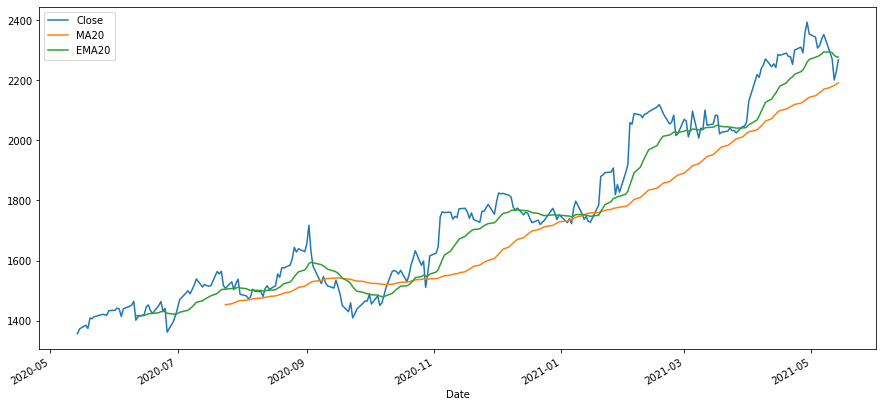

In [25]:
google = web.DataReader('GOOGL', 'yahoo', start, end)
google['MA20'] = google['Close'].rolling(50).mean()
google['EMA20'] = caculateEMA(google['Close'],20)
google['Close'].plot(figsize=(15, 7), label='Close')
google['MA20'].plot(label='MA20')
google['EMA20'].plot(label='EMA20')
plt.legend()
